<a href="https://colab.research.google.com/github/rjromo/dinamica_procesos/blob/main/LazoCerrado_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#pip install slycot

     |████████████████████████████████| 1.6MB 12.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp36-cp36m-linux_x86_64.whl size=1413150 sha256=9b303d10e02f8480015f98d6fa2a9ae224e0aa16c367d416b244da6fe140c318
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot


In [5]:
#pip install control

     |████████████████████████████████| 256kB 12.2MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=96e63d52551191dd3f2613b3780a096d8e894feef12fb588a5d98e4754aee850
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as co

In [12]:
km = 2.66
Gm = km

kc = 1
taui = 1
taud = 1
nGPID = [kc*taud,kc,kc/taui]
dGPID = [1,0]
GPID = co.tf(nGPID,dGPID)
print(GPID)


s^2 + s + 1
-----------
     s



In [26]:
GPI = 0.3
Gv = 1.66
nGp = [0.08]
dGp = [15,1]
Gp = co.tf(nGp,dGp)
print(Gp)


  0.08
--------
15 s + 1



In [31]:
nd = [0.6]
dd = [15,1]
Gd = co.tf(nd,dd)
print(Gd)


  0.6
--------
15 s + 1



In [28]:
Gforward1 = km*GPID*GPI*(Gv)*Gp
Gevery1 = GPID*GPI*(Gv)*Gp*Gm
G1 = Gforward1/(1+Gevery1)
print(G1)


1.59 s^4 + 1.696 s^3 + 1.696 s^2 + 0.106 s
------------------------------------------
226.6 s^4 + 31.7 s^3 + 2.696 s^2 + 0.106 s



In [29]:
Gforward2 = Gd
Gevery2 = GPID*GPI*(Gv)*Gp*Gm
G2 = Gforward2/(1+Gevery2)
print(G2)


            9 s^2 + 0.6 s
--------------------------------------
226.6 s^3 + 31.7 s^2 + 2.696 s + 0.106



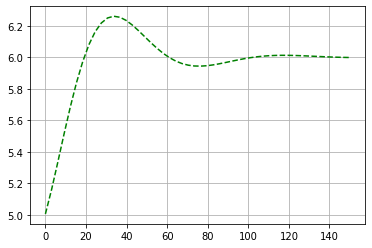

In [34]:
time = np.linspace(0,150)
t,y1 = co.step_response(G1,time)
t,y2 = co.step_response(G2,time)
plt.plot(t,y2+y1+5, 'g--')
plt.grid()
plt.show()